
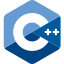
<br>

<div style="text-align:center; font-size:200%;">
 <b>SRP: Lösungsansätze</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 06 SRP Lösungsansätze.ipynb -->
<!-- slides/module_500_solid_grasp/topic_280_srp_resolutions.cpp -->


## Ein Änderungsgrund?

<img src="img/book_01.svg"
     style="display:block;margin:auto;width:35%"/>



## Verletzung des SRPs

<img src="img/book_02.svg"
     style="display:block;margin:auto;width:60%"/>

In [ ]:
#include <string>
#include <iostream>

In [ ]:
class Book
{
public:
    Book(const std::string& title, const std::string& author, int pages)
        : title{title}, author{author}, pages{pages}
    {}

    void print() {
        // Lots of code that handles the printer
        std::cout << "Printing " << title << " to printer." << std::endl;
    }

    void save() {
        // Lots of code that handles the database
        std::cout << "Saving " << title << " to database." << std::endl;
    }

private:
    std::string title;
    std::string author;
    int pages;
}


## Auflösung der SRP-Verletzung (Version 1a)

Vorschlag von Robert C. Martin in Clean Architecture:

<img src="img/book_resolution_1a_srp.svg"
     style="display:block;margin:auto;width:40%"/>

In [ ]:
class BookV1
{
public:
    BookV1(const std::string& title, const std::string& author, int pages)
        : title{title}, author{author}, pages{pages}
    {}

    std::string get_title() const { return title; }
    std::string get_author() const { return author; }
    int get_pages() const { return pages; }

private:
    std::string title;
    std::string author;
    int pages;
}

In [ ]:
class BookPrinterV1a
{
public:
    BookPrinterV1a(const BookV1& book)
        : book{&book}
    {}

    void print() {
        // Lots of code that handles the printer
        std::cout << "Printing " << book->get_title() << " to printer." << std::endl;
    }

private:
    const BookV1* book;
}

In [ ]:
class BookDatabaseV1a
{
public:
    BookDatabaseV1a(const BookV1& book)
        : book{&book}
    {}

    void save() {
        // Lots of code that handles the database
        std::cout << "Saving " << book->get_title() << " to database." << std::endl;
    }

private:
    const BookV1* book;
}


## Auflösung der SRP-Verletzung (Version 1a mit Fassade)

<img src="img/book_resolution_1a_srp_facade.svg"
     style="display:block;margin:auto;width:50%"/>

In [ ]:
class BookPrinterFacadeV1a
{
public:
    BookPrinterFacadeV1a(const BookV1& book)
        : book_printer{book}, book_database{book}
    {}

    void print() {
        book_printer.print();
    }

    void save() {
        book_database.save();
    }

private:
    BookPrinterV1a book_printer;
    BookDatabaseV1a book_database;
}


## Auflösung der SRP-Verletzung (Version 1b)

<img src="img/book_resolution_1_srp.svg"
     style="display:block;margin:auto;width:50%"/>

In [ ]:
class BookPrinterV1b
{
public:
    void print(const BookV1& book) {
        // Lots of code that handles the printer
        std::cout << "Printing " << book.get_title() << " to printer.\n";
    }
}

In [ ]:
class BookDatabaseV1b
{
public:
    void save(const BookV1& book) {
        // Lots of code that handles the database
        std::cout << "Saving " << book.get_title() << " to database.\n";
    }
}


## Auflösung der SRP-Verletzung (Version 1b mit Facade)

<img src="img/book_resolution_1_srp_facade.svg"
     style="display:block;margin:auto;width:50%"/>

In [ ]:
class BookFacadeV1b {
public:
    BookFacadeV1b(const BookV1& book) : book{&book} {}

    void print() {
        book_printer.print(*book);
    }

    void save() {
        book_database.save(*book);
    }

private:
    const BookV1* book;
    BookPrinterV1b book_printer;
    BookDatabaseV1b book_database;
}


## Auflösung der SRP-Verletzung (Version 2)

<img src="img/book_resolution_2_srp.svg"
     style="display:block;margin:auto;width:60%"/>

In [ ]:
#include <iostream>
#include <string>

In [ ]:
template <typename T>
class BookPrinterV2
{
public:
    void print(const T& book)
    {
        // Lots of code that handles the printer
        std::cout << "Printing " << book.get_title() << " to printer.\n";
    }
};

In [ ]:
template <typename T>
class BookDatabaseV2
{
public:
    void save(const T& book)
    {
        // Lots of code that handles the database
        std::cout << "Saving " << book.get_title() << " to database.\n";
    }
};

In [ ]:
class BookV2a
{
public:
    BookV2a(const std::string& title, const std::string& author, int pages)
        : title{title}, author{author}, pages{pages}
    {}

    std::string get_title() const { return title; }
    std::string get_author() const { return author; }
    int get_pages() const { return pages; }
    void print() { book_printer.print(*this); }
    void save() { book_database.save(*this); };

private:
    std::string title;
    std::string author;
    int pages;
    BookPrinterV2<BookV2a> book_printer;
    BookDatabaseV2<BookV2a> book_database;
}

In [ ]:
#include <memory>

In [ ]:
class BookV2
{
public:
    BookV2(const std::string& title, const std::string& author, int pages,
           std::shared_ptr<BookPrinterV2<BookV2>> book_printer,
           std::shared_ptr<BookDatabaseV2<BookV2>> book_database);

    std::string get_title() const { return title_; }
    std::string get_author() const { return author_; }
    int get_pages() const { return pages_; }
    void print() { book_printer_->print(*this); }
    void save() { book_database_->save(*this); }

private:
    std::string title_;
    std::string author_;
    int pages_;
    std::shared_ptr<BookPrinterV2<BookV2>> book_printer_;
    std::shared_ptr<BookDatabaseV2<BookV2>> book_database_;
}

In [ ]:
BookV2::BookV2(const std::string& title, const std::string& author, int pages,
       std::shared_ptr<BookPrinterV2<BookV2>> book_printer,
       std::shared_ptr<BookDatabaseV2<BookV2>> book_database)
    : title_(title), author_(author), pages_(pages)
    , book_printer_(std::move(book_printer)), book_database_(std::move(book_database))
{}


## Vergleich

<div>
<img src="img/book_resolution_1a_srp.svg"
     style="float:left;padding:5px;width:40%"/>
<img src="img/book_resolution_2_srp.svg"
     style="float:right;padding:5px;width:50%"/>
</div>


## Workshop: Wetter-App

Sie arbeiten an einer vielseitigen Wetteranwendung namens WeatherWise. Die
WeatherWise App bietet ihren Benutzern aktuelle Wetterinformationen aus
verschiedenen Online-Plattformen. Über die Anzeige der aktuellen Bedingungen
hinaus ermöglicht die App den Benutzern, die Vorhersage in verschiedenen
visuellen Formaten anzuzeigen, und sie protokolliert Fehler für alle Probleme
während des Datenabrufs oder der Analyse.

Während WeatherWise für seine Funktionen gut ankommt, sieht sich das
Entwicklungsteam mit Herausforderungen bei der Wartung und Erweiterung der
Anwendung konfrontiert. Die Entwickler haben festgestellt, dass die
Kernklasse, `Weather`, zunehmend komplex wird. Sie behandelt alles von der
Datenbeschaffung bis zur Datendarstellung. Diese Komplexität erschwert die
Einführung neuer Funktionen, ohne dass dabei die Gefahr besteht, Fehler
einzuführen.

Ihre Aufgabe: Refaktorisieren Sie die Klasse `Weather`, indem Sie
sicherstellen, dass jede Klasse im System dem Single Responsibility Principle
entspricht. Damit legen Sie die Grundlage für eine wartbarere und
skalierbarere Anwendung.


### Klassendiagramm der Wetter-App

<img src="img/weather_app_class.svg"
     style="display:block;margin:auto;width:40%"/>


### RunWeatherApp() Sequenzendiagramm

<img src="img/weather_app_sequence.svg"
     style="display:block;margin:auto;width:30%"/>

In [ ]:
#include <iostream>
#include <sstream>
#include <string>
#include <vector>

In [ ]:
class Weather
{
public:
    void FetchDataFromSource();
    void ParseData();
    void DisplayInFormatA();
    void DisplayInFormatB();
    void LogError(const std::string& errorMsg);
    std::string FormatData() const;

private:
    std::string rawData_;
    std::vector<double> data_;
};

In [ ]:
void Weather::FetchDataFromSource()
{
    // Simulating fetching data from some source
    rawData_ = "Sunny, 25°C";
    std::cout << "Data fetched from source.\n";
}

In [ ]:
void Weather::ParseData()
{
    // Simulate data parsing
    if (rawData_.empty()) {
        LogError("No data available");
        return;
    }
    data_ = {10.0, 12.0, 8.0, 15.0, 20.0, 22.0, 25.0};
    std::cout << "Data parsed: " << FormatData() << "\n";
}

In [ ]:
void Weather::DisplayInFormatA()
{
    // Simulating one display format
    if (data_.empty()) {
        LogError("No data available");
        return;
    }
    std::cout << "Format A: " << FormatData() << "\n";
}

In [ ]:
void Weather::DisplayInFormatB()
{
    // Simulating another display format
    if (data_.empty()) {
        LogError("No data available");
        return;
    }
    std::cout << "Format B: === " << FormatData() << " ===\n";
}

In [ ]:
void Weather::LogError(const std::string& errorMsg)
{
    // Simulating error logging
    std::cout << "Error: " << errorMsg << "\n";
}

In [ ]:
std::string Weather::FormatData() const
{
    std::ostringstream stream;
    std::copy(
        data_.begin(), data_.end(), std::ostream_iterator<double>(stream, ", "));
    return stream.str();
}

In [ ]:
void RunWeatherApp(bool introduceError = false)
{
    Weather w;
    w.FetchDataFromSource();
    if (!introduceError) {
        w.ParseData();
    }
    w.DisplayInFormatA();
    w.DisplayInFormatB();
}

In [ ]:
RunWeatherApp();

In [ ]:
RunWeatherApp(true);